## Applied Data Science Capstone of Coursera
This notebook will be used for the Capstone project of the IBM Data Science Professional Certificate from Coursera.

The case study is to predict the severity of a car accident.

In [1]:
# Import Python libraries
import pandas as pd
import numpy as np

In [2]:
# Print the "Hello World"
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Table of Contents
<a name="toc"></a>
- [Data Source](#Data-Source)
- [Data Evaluation](#Data-Evaluation)
    - [Accident Severity Distribution](#Accident-Severity-Distribution)
    - [Correlation Map](#Correlation-Map)
    - [Speed Limit](#Speed-Limit)
    - [Urban or Rural Area](#Urban-or-Rural-Area)
    - [1st Road Class](#1st-Road-Class)
    - [Hour](#Hour)
    - [Day of the Week](#Day-of-the-Week)
    - [Month](#Month)
    - [Road Type](#Road-Type)
    - [Junction Details](#Junction-Details)
    - [Road Surface Conditions](#Road-Surface-Conditions)
    - [Special Conditions](#Special-Conditions)
    - [Carriageway Hazards](#Carriageway-Hazards)
    - [Light Conditions](#Light-Conditions)
    - [Weather Conditions](#Weather-Conditions)
- [Model](#Model)
    - [K Nearest Neighbors (KNN)](#K-Nearest-Neighbors-(KNN))
    - [Decision Tree](#Decision-Tree)
    - [Bootstrap Aggregating (Bagging) Classifier](#Bootstrap-Aggregating-(Bagging)-Classifier)
    - [Adaptive Boosting](#Adaptive-Boosting)
    - [Random Forest Classifier](#Random-Forest-Classifier)
    - [Balanced Bagging Classifier](#Balanced-Bagging-Classifier)
    - [Balanced Random Forest](#Balanced-Random-Forest)
- [Test the Model](#Test-the-Model)
    - [Balanced Bagging for 2 target classes](#Balanced-Bagging-for-2-target-classes)
    - [Balanced Random Forest for 2 target classes](#Balanced-Random-Forest-for-2-target-classes)
    - [Test the new models](#Test-the-new-models)
    - [Relative importance](#Relative-importance)

### Data Source
[(top)](#toc)

The data used in this study were collected by UK police forces and made available to the public, excluding the sensitive variables, through the open data UK government site (https://data.gov.uk/).  
These datasets are made available to the public under the Open Government Licence (http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3).

The web address for the download is the following: https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data.

Only the 2017 (`Acc.csv`) and 2018 (`dftRoadSafetyData_Accidents_2018.csv`) 'accident' databases will be used for the model training. The 2016 'accident' database (`dftRoadSafety_Accidents_2016.csv`) will be used for model testing.

In [3]:
# Load 2017 'accident' database
df=pd.read_csv('Acc.csv',low_memory=False)
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,0,0,4,1,1,0,0,1,1,E01001450
1,2017010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,01/01/2017,...,0,0,4,1,2,0,0,1,1,E01004702
2,2017010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,01/01/2017,...,0,0,4,1,1,0,0,1,1,E01004298
3,2017010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,01/01/2017,...,0,4,4,2,2,0,0,1,1,E01001429
4,2017010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,01/01/2017,...,0,5,4,1,2,0,0,1,1,E01001808


In [4]:
# Load 2018 'accident' database
df2=pd.read_csv('dftRoadSafetyData_Accidents_2018.csv',low_memory=False)
df2.shape

(122635, 32)

In [5]:
# merge the two databases
df2=df2.append(df,verify_integrity=True,ignore_index=True)
del df
df2.shape

(252617, 32)

In [6]:
# Visualize columns and basic info
df2.describe(include='all')

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
count,252617,252543.000000,2.525430e+05,252533.000000,252533.000000,252617.000000,252617.000000,252617.000000,252617.000000,252617,...,252617.000000,252617.000000,252617.000000,252617.000000,252617.000000,252617.000000,252617.000000,252617.000000,252617.000000,239041
unique,252617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31962
top,2017120203414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/12/2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E01032739
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365
mean,NaN,451275.201443,2.831922e+05,-1.266712,52.435956,28.431851,2.792599,1.842057,1.312619,NaN,...,-0.000645,0.843807,2.020782,1.629617,1.275852,0.073966,0.046751,1.327159,1.278900,NaN
std,NaN,95156.146647,1.532393e+05,1.395735,1.380236,24.970125,0.436904,0.721936,0.764506,NaN,...,0.252100,1.972113,1.713125,1.814200,0.622163,0.660682,0.547148,0.469750,0.456837,NaN
min,NaN,73639.000000,1.023500e+04,-7.409550,49.912362,1.000000,1.000000,1.000000,1.000000,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
25%,NaN,387187.500000,1.759400e+05,-2.192284,51.469786,5.000000,3.000000,1.000000,1.000000,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN
50%,NaN,457656.000000,2.238460e+05,-1.148510,51.897075,23.000000,3.000000,2.000000,1.000000,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN
75%,NaN,528940.000000,3.886590e+05,-0.141344,53.392074,45.000000,3.000000,2.000000,1.000000,NaN,...,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,NaN


### Data cleaning
- Drop unused columns
- Check and remove (drop or replace) null values

In [7]:
# Replace -1 (used for missing or out-of-range values) with NaN
df2.replace(-1,np.nan,inplace=True)
# Check if there are duplicated rows
df2.Accident_Index.duplicated().sum()

0

In [8]:
# Check the percentage of null values for each column
for i in range(0,df2.shape[1]):
    print('%43s' % df2.columns[i],' contains ', '%6.3f' % (df2.iloc[:,i].isnull().sum()/df2.shape[0]*100), '% null values')

                             Accident_Index  contains   0.000 % null values
                      Location_Easting_OSGR  contains   0.029 % null values
                     Location_Northing_OSGR  contains   0.029 % null values
                                  Longitude  contains   0.033 % null values
                                   Latitude  contains   0.033 % null values
                               Police_Force  contains   0.000 % null values
                          Accident_Severity  contains   0.000 % null values
                         Number_of_Vehicles  contains   0.000 % null values
                       Number_of_Casualties  contains   0.000 % null values
                                       Date  contains   0.000 % null values
                                Day_of_Week  contains   0.000 % null values
                                       Time  contains   0.006 % null values
                 Local_Authority_(District)  contains   0.000 % null values
            

For the analysis, the following columns will be dropped:
- 'Accident_Index', since no connection to the casualties or vehicle databases will be taken into account;
- 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Number', '2nd_Road_Number', 'LSOA_of_Accident_Location', since the geographical position or the department in which the accident happened will not be taken into account;
- 'Junction_Control', '2nd_Road_Class', since roughly 40% of the values for these columns are null;
- 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', because a distinction between accidents involving pedestrians and other accidents will not be considered in this study;
- 'Number_of_Vehicles', 'Number_of_Casualties', because the aim of the model is to predict the severity of an accident given the particular weather, time and road conditions, not the possible number of vehicles involved and casualties;
- 'Did_Police_Officer_Attend_Scene_of_Accident'

In [9]:
data = df2.drop(labels=['Accident_Index', 'Location_Easting_OSGR','Location_Northing_OSGR',
                        'Longitude', 'Latitude', 'Police_Force', 'Number_of_Vehicles',
                        'Number_of_Casualties', 'Local_Authority_(District)',
                        'Local_Authority_(Highway)', '1st_Road_Number', 'Junction_Control',
                        '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
                        'Pedestrian_Crossing-Physical_Facilities', 'Did_Police_Officer_Attend_Scene_of_Accident',
                        'LSOA_of_Accident_Location'], axis=1)
del df2
data.head()

,Accident_Severity,Date,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,3,01/01/2018,2,01:30,3,3,30,0.0,4.0,1.0,1.0,0.0,0.0,1.0
1,3,01/01/2018,2,00:50,4,6,30,2.0,4.0,1.0,1.0,0.0,0.0,1.0
2,3,01/01/2018,2,00:45,3,6,20,6.0,4.0,1.0,1.0,0.0,0.0,1.0
3,2,01/01/2018,2,03:00,4,3,30,7.0,4.0,2.0,2.0,0.0,0.0,1.0
4,2,01/01/2018,2,02:20,3,6,30,0.0,4.0,1.0,2.0,0.0,0.0,1.0


In [10]:
# Extract month from the date
data['Month']=pd.DatetimeIndex(data.Date).month
data.drop(['Date'], axis=1, inplace=True)

In [11]:
# Extract hour from time column
data['Time']=pd.DatetimeIndex(data.Time).hour
data.rename(columns={'Time':'Hour'},inplace=True)

In [12]:
# Check remaining null values
for i in range(0,data.shape[1]):
    print('%43s' % data.columns[i],' contains ', '%4.0f' % (data.iloc[:,i].isnull().sum()), ' null values')

                          Accident_Severity  contains     0  null values
                                Day_of_Week  contains     0  null values
                                       Hour  contains    16  null values
                             1st_Road_Class  contains     0  null values
                                  Road_Type  contains     0  null values
                                Speed_limit  contains     0  null values
                            Junction_Detail  contains  1381  null values
                           Light_Conditions  contains     1  null values
                         Weather_Conditions  contains    20  null values
                    Road_Surface_Conditions  contains  3160  null values
                 Special_Conditions_at_Site  contains  3730  null values
                        Carriageway_Hazards  contains  3398  null values
                        Urban_or_Rural_Area  contains     1  null values
                                      Month  contai

In [13]:
# Assuming no special conditions or no carriageway hazards where not specified
data['Special_Conditions_at_Site'] = data['Special_Conditions_at_Site'].fillna(0)
data['Carriageway_Hazards'] = data['Carriageway_Hazards'].fillna(0)

In [14]:
data['Junction_Detail'].value_counts()

0.0    106354
3.0     74860
6.0     23774
1.0     20725
9.0      9360
8.0      6065
5.0      3846
7.0      3154
2.0      3098
Name: Junction_Detail, dtype: int64

In [15]:
# Assuming no junctions (i.e. mode of the data) in case of missing data
data['Junction_Detail'] = data['Junction_Detail'].fillna(0)

In [16]:
# Evaluate the max percentage of dropped rows if each null corresponds to a single row
data.isnull().sum().sum()/data.shape[0]*100

1.2659480557523841

In [17]:
print(data.shape)
#drop the remaining nulls (that are <2% of total data)
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)
print(data.shape)
data.head()

(252617, 14)
(249441, 14)


,Accident_Severity,Day_of_Week,Hour,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Month
0,3,2,1.0,3,3,30,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1
1,3,2,0.0,4,6,30,2.0,4.0,1.0,1.0,0.0,0.0,1.0,1
2,3,2,0.0,3,6,20,6.0,4.0,1.0,1.0,0.0,0.0,1.0,1
3,2,2,3.0,4,3,30,7.0,4.0,2.0,2.0,0.0,0.0,1.0,1
4,2,2,2.0,3,6,30,0.0,4.0,1.0,2.0,0.0,0.0,1.0,1


In [18]:
# Evaluate the actual percentage of line dropped
(252617-249441)/252617*100

1.2572392198466453

In [19]:
# From the metadata: 1 = Fatal; 2 = Serious; 3 = Slight
data['Accident_Severity'].replace({ 1 : 'Fatal', 2 : 'Serious', 3 : 'Slight' },inplace=True)
# Use integer for hour
data.Hour = data.Hour.astype(int)

## Data Evaluation
[(top)](#toc)

In this section, the data will be prepared for the prediction model.

Some preliminary visual investigations will be carried on to have a better understanding of the relationships between data and data impact on the accident severity target.

#### Accident Severity Distribution

Accident severity count percentages:
[['Slight' 80.433]
 ['Serious' 18.226]
 ['Fatal' 1.341]]


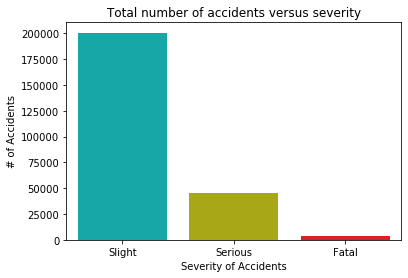

In [20]:
# Import Python libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Evaluate the relative weight of the different accident severity labels
sns.countplot(data=data,x='Accident_Severity',palette=['c','y','r'])
plt.xlabel('Severity of Accidents')
plt.ylabel('# of Accidents')
plt.title('Total number of accidents versus severity')

print('Accident severity count percentages:')
print((round(data['Accident_Severity'].value_counts(normalize=True)*100,3)).reset_index().values)

Roughly 80.4% of the accidents in the sample were considered slight accidents (i.e. no deaths and no long term hospitalization or serious injuries).

Roughly 18.2% were serious injuries and roughly 1.3% were fatal accidents.

The severity distribution is remarkably unbalanced towards slight injury accidents. This fact must be taken into account when building the prediction model.

#### Correlation Map
A correlation map can be plotted to verify if it is possible to reduce the number of independent variables.

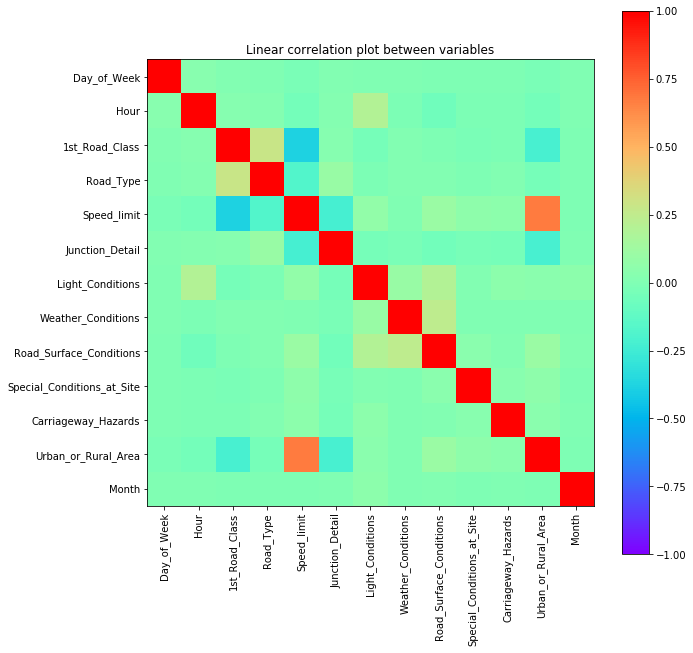

In [21]:
# Check if there is correlation between data, to reduce input parameters
correlations = data.corr()
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
handle = ax.imshow(correlations, vmin=-1, vmax=1, cmap = 'rainbow')
fig.colorbar(handle)
plt.xticks(range(0,len(data.columns[1:])),labels=data.columns[1:],rotation='vertical')
plt.yticks(range(0,len(data.columns[1:])),labels=data.columns[1:])
plt.title('Linear correlation plot between variables')
plt.show()

From the correlation map, there is some degree of positive correlation between speed limit and 'urban or rual area' variables, and negative correlation between speed limit and '1st road class'.

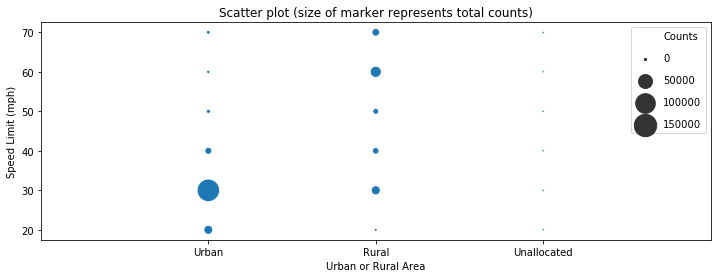

In [22]:
plt.figure(figsize=(12,4))
conteggi=data.groupby(['Urban_or_Rural_Area','Speed_limit']).size().reset_index(name='Counts')
sns.scatterplot(x='Urban_or_Rural_Area',y='Speed_limit',data=conteggi,size='Counts',sizes=(5,500),marker='o',legend='brief')
plt.xlim([0,4])
plt.xticks(range(1,4),labels=['Urban','Rural','Unallocated'])
plt.legend(labelspacing=1.2)
plt.xlabel('Urban or Rural Area')
plt.ylabel('Speed Limit (mph)')
plt.title('Scatter plot (size of marker represents total counts)')
plt.show()

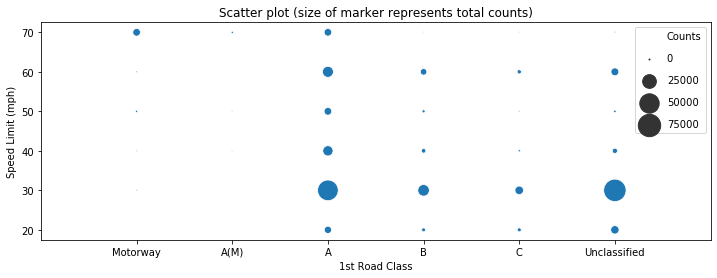

In [23]:
plt.figure(figsize=(12,4))
conteggi=data.groupby(['1st_Road_Class','Speed_limit']).size().reset_index(name='Counts')
sns.scatterplot(x='1st_Road_Class',y='Speed_limit',data=conteggi,size='Counts',sizes=(1,500),marker='o',legend='brief')
plt.xlim([0,7])
plt.xticks(range(1,7),labels=['Motorway','A(M)','A','B','C','Unclassified'])
plt.legend(labelspacing=1.2)
plt.xlabel('1st Road Class')
plt.ylabel('Speed Limit (mph)')
plt.title('Scatter plot (size of marker represents total counts)')
plt.show()

The correlation between 'Urban or Rural Area' and speed limit is more evident, since most of the low velocity roads (30 mph speed limit) are in urban areas, while most of the high velocity roads (60-70 mph speed limit) are in rural areas.

Motorways are high speed roads, with speed limit in general 70 mph. A, B and C road speed limit span over the full range. Most of the unclassified roads are low velocity roads (30 mph).

'1st_Road_Class' and 'Urban_or_Rural_Area' columns could possibly be dropped when training the models.

#### Speed Limit

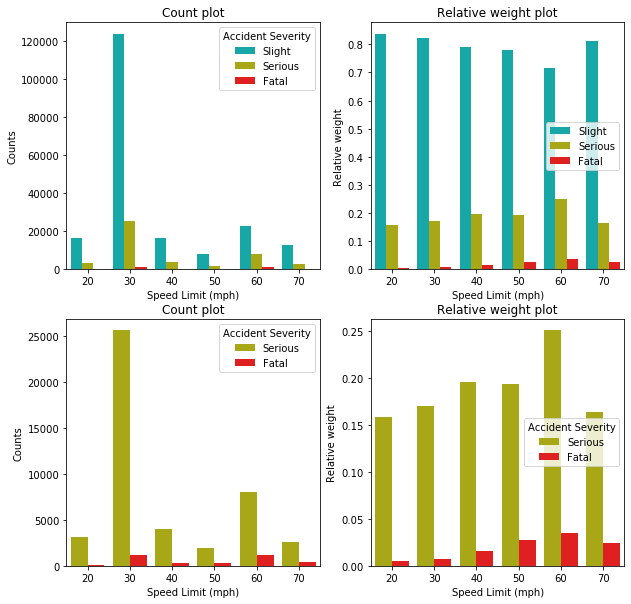

In [24]:
# Define a useful function to visualize counts and relative weight
def count_weight_plot(data,xval):
    ax = plt.subplot(2,2,1)
    conteggi = data.groupby([xval])['Accident_Severity'].value_counts(normalize=False).rename('percent').reset_index()
    sns.barplot(data=conteggi,x=xval,y='percent',hue='Accident_Severity',palette=['c','y','r'],ax=ax)
    plt.title('Count plot')
    plt.ylabel('Counts')
    plt.legend(title='Accident Severity')
    ax1 = plt.subplot(2,2,2)
    conteggi1 = data.groupby([xval])['Accident_Severity'].value_counts(normalize=True).rename('percent').reset_index()
    sns.barplot(data=conteggi1,x=xval,y='percent',hue='Accident_Severity',palette=['c','y','r'],ax=ax1)
    plt.legend(loc='center right')
    plt.title('Relative weight plot')
    plt.ylabel('Relative weight')
    ax = plt.subplot(2,2,3)
    sns.barplot(data=conteggi[conteggi['Accident_Severity']!='Slight'],x=xval,y='percent',hue='Accident_Severity',palette=['y','r'],ax=ax)
    plt.ylabel('Counts')
    plt.title('Count plot')
    plt.legend(title='Accident Severity')
    ax1 = plt.subplot(2,2,4)
    sns.barplot(data=conteggi1[conteggi['Accident_Severity']!='Slight'],x=xval,y='percent',hue='Accident_Severity',palette=['y','r'],ax=ax1)
    plt.legend(loc='center right',title='Accident Severity')
    plt.ylabel('Relative weight')
    plt.title('Relative weight plot')

# Evaluate the influence of speed limit
xval='Speed_limit'
fig = plt.figure(figsize=(10,10))
count_weight_plot(data,xval)
for aa in fig.axes:
    aa.set_xlabel('Speed Limit (mph)')
plt.show()

Most of the accidents in the database happened at low velocities (30 mph). A secondary peak appears at 60 mph.

However, when considering the relative weight inside the speed limit variable, for low speed limit the percentage of serious and fatal accidents  is lower than in the case of large speed limit. In particular, the relative weight of fatal accidents reaches its maximum for speed limit 60 mph. Indeed, the number of fatal accidents at 30 mph limit is roughly the same as 60 mph limit, but the total number of accidents at 30 mph is much larger than in the 60 mph case.

#### Urban or Rural Area

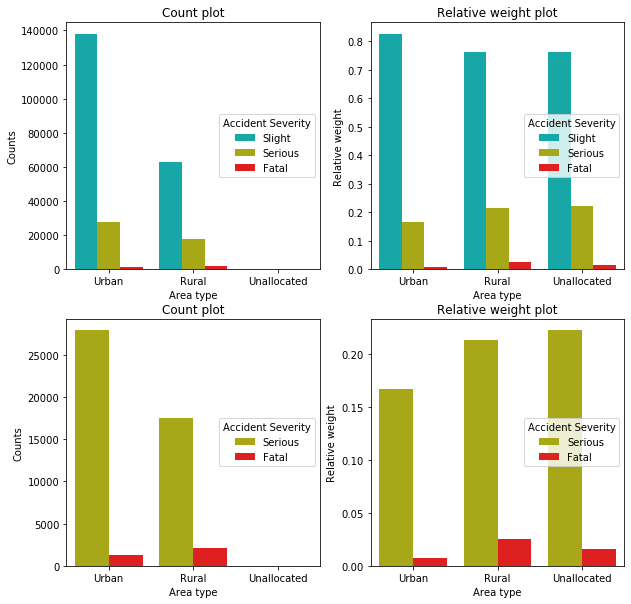

In [25]:
# Evaluate the influence of Urban-Rural area
xval='Urban_or_Rural_Area'
fig = plt.figure(figsize=(10,10))
count_weight_plot(data,xval)
for aa in fig.axes:
    aa.set_xlabel('Area type')
    aa.xaxis.set_ticks(range(0,3))
    aa.xaxis.set_ticklabels(['Urban', 'Rural', 'Unallocated'])
    aa.legend(loc='center right',title='Accident Severity')
plt.show()

Most of the accidents happened in urban areas. However, when considering relative weights, the relative percentage of serious and fatal accidents in rural areas is higher. As found with the correlation analysis, this is probably caused by the fact that high velocity roads are more frequent in rural areas.

#### 1st Road Class

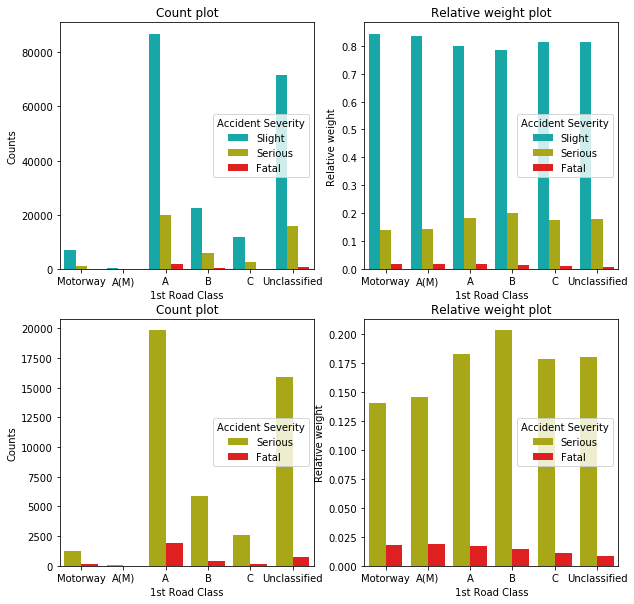

In [26]:
# Evaluate the influence of 1st Road Class
xval='1st_Road_Class'
fig = plt.figure(figsize=(10,10))
count_weight_plot(data,xval)
roadclass=['Motorway','A(M)','A','B','C','Unclassified']
for aa in fig.axes:
    aa.set_xlabel('1st Road Class')
    aa.xaxis.set_ticks(range(0,6))
    aa.xaxis.set_ticklabels(roadclass)
    aa.legend(loc='center right',title='Accident Severity')
plt.show()

The classes of the roads with the majority of accidents are: A and Unclassified.When considering the relative weight of accidents, serious accidents have a maximum for B class roads. Fatal accident relative weight slightly decreases when passing from Motorways and A classes to B and C classes. This is probably due to the partial correlation of road class and speed limit.

#### Hour

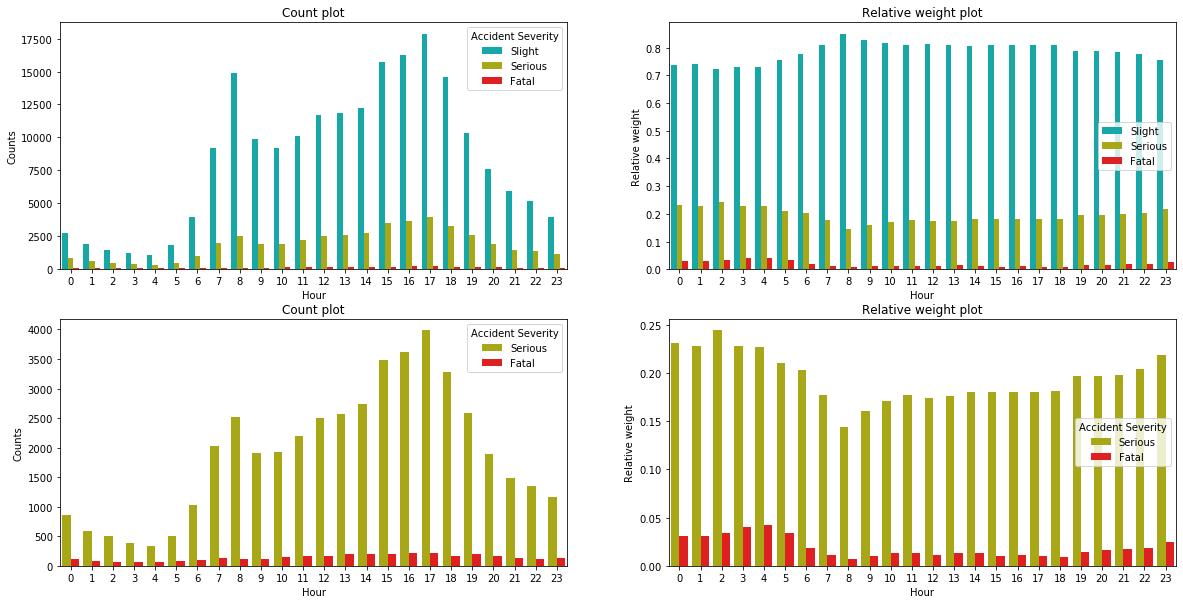

In [27]:
# Evaluate the influence of hour
xval='Hour'
fig = plt.figure(figsize=(20,10))
count_weight_plot(data,xval)
for aa in fig.axes:
    aa.set_xlabel('Hour')
plt.show()

When looking at the distribution with respect to hour of the day, there are two peaks corresponding to rush hours, between 7 and 9 and between 15 and 18. The max accident count happened at 18, during evening rush hour. The plot of relative weight of accidents, i.e. number of accidents normalized to the total number of accidents happened at that hour, show that during morning rush hour the relative weight of slight accidents was larger, while during the night (from 23 to 5) the relative weight of fatal accidents is larger, with a peak around 4.

By looking at the distribution, the hour variable can be grouped in a series of time periods: Morning Rush (6-9), Day (10-14), Evening Rush (15-18), Evening (19-22), Night (23-5).

In [28]:
# timeperiod = {0: 'Morning Rush (6-9)', 1: 'Day (10-14)', 2: 'Evening Rush (15-18)', 3: 'Evening (19-22)', 4: 'Night (23-5)'}
timeperiod = {0: '(6-9)', 1: '(10-14)', 2: '(15-18)', 3: '(19-22)', 4: '(23-5)'}
def find_time_period(x):
    if ((x<=9) and (x>=6)):
        return 0
    if ((x<=14) and (x>=10)):
        return 1
    if ((x<=18) and (x>=15)):
        return 2
    if ((x<=22) and (x>=19)):
        return 3
    if ((x<=5) or (x==23)):
        return 4
    else:
        return -1

data['Time_Period']=data['Hour'].apply(find_time_period)


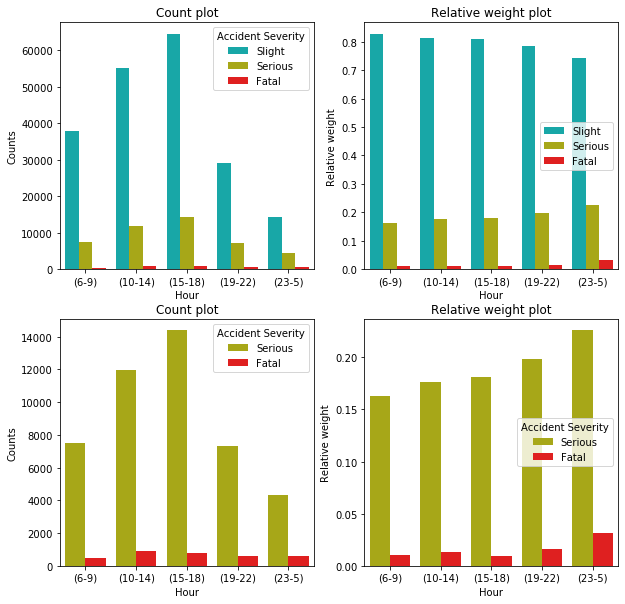

In [29]:
# Evaluate the influence of time period
xval='Time_Period'
fig = plt.figure(figsize=(10,10))
count_weight_plot(data,xval)
for aa in fig.axes:
    aa.set_xlabel('Hour')
    aa.xaxis.set_ticks(range(0,5))
    aa.xaxis.set_ticklabels(['(6-9)', '(10-14)', '(15-18)', '(19-22)', '(23-5)'])
plt.show()

#### Day of the Week

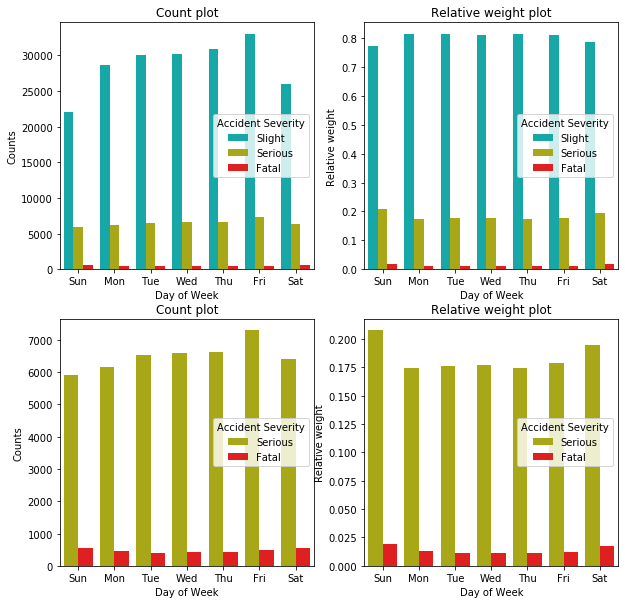

In [30]:
# Evaluate the influence of day of the week
xval='Day_of_Week'
fig = plt.figure(figsize=(10,10))
count_weight_plot(data,xval)
for aa in fig.axes:
    aa.set_xlabel('Day of Week')
    aa.xaxis.set_ticks(range(0,7))
    aa.xaxis.set_ticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    aa.legend(loc='center right',title='Accident Severity')
plt.show()

During Saturdays and Sundays the frequency of accidents is slightly lower. There is a peak on accident counts on Fridays.

However, there is no clear correlation between relative weight of accident severity and the day of the week. A slight increase in the relative weight of serious and fatal accident seems to be present in the weekend.

The combined contribution of day of the week and time period can be analyzed.

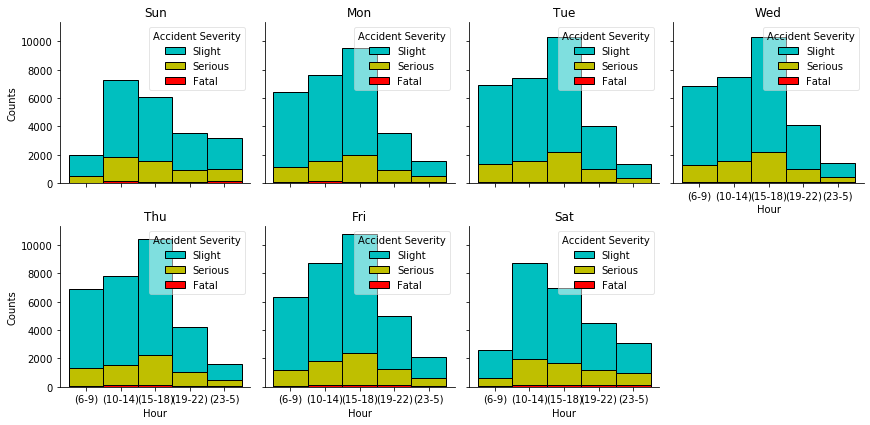

In [31]:
xval='Time_Period'
bins = np.linspace(data[xval].min()-0.5, data[xval].max()+0.5, len(data[xval].unique())+1)
g = sns.FacetGrid(data, col='Day_of_Week', hue='Accident_Severity',
                  palette=['c','y','r'], col_wrap=4, aspect=1)
g.map(plt.hist, xval, ec='k', bins=bins)
g.fig.tight_layout()

days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
for index, aa in enumerate(g.axes):
    if (index>=3):
        aa.set_xlabel('Hour')
    aa.xaxis.set_ticks(range(0,5))
    aa.xaxis.set_ticklabels(['(6-9)', '(10-14)', '(15-18)', '(19-22)', '(23-5)'])
    aa.legend(loc='upper right',title='Accident Severity',framealpha=0.5)
    aa.set_title(days[index])
g.axes[0].set_ylabel('Counts')
g.axes[4].set_ylabel('Counts')
plt.show()

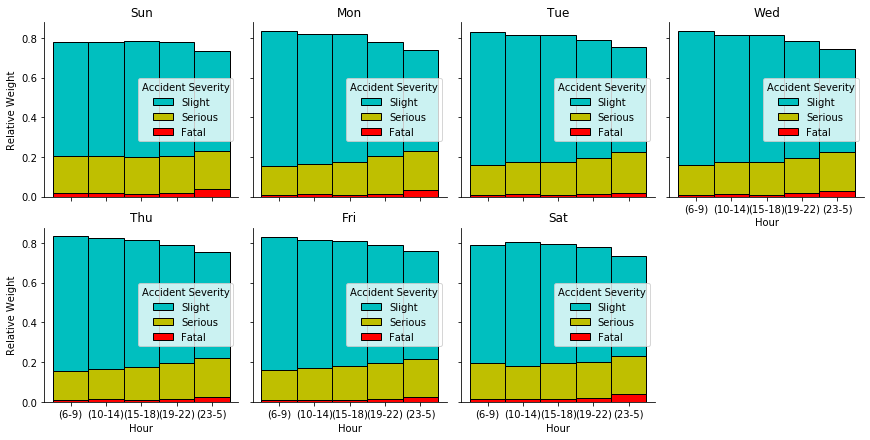

In [32]:
def plot_norm(*args, **kwargs):
    data = kwargs.pop('data')
    xval = kwargs.pop('x')
    if 'normalize' in kwargs:
        norm = kwargs.pop('normalize')
    else:
        norm = False
    conteggi = data.groupby([xval])['Accident_Severity'].value_counts(normalize=norm).rename('value').reset_index()
    ax = plt.gca()
    ax.bar(data=conteggi[conteggi['Accident_Severity']=='Slight'],x=xval,height='value', label='Slight',
                color=['c'], ec='k',width=1)
    ax.bar(data=conteggi[conteggi['Accident_Severity']=='Serious'],x=xval,height='value', label='Serious',
                color=['y'], ec='k',width=1)
    ax.bar(data=conteggi[conteggi['Accident_Severity']=='Fatal'],x=xval,height='value', label='Fatal',
                color=['r'], ec='k',width=1)

xval='Time_Period'
g = sns.FacetGrid(data, col='Day_of_Week', col_wrap=4, aspect=1)
g.map_dataframe(plot_norm, x=xval, ec='k', data=data, normalize=True)
for index, aa in enumerate(g.axes):
    if (index>=3):
        aa.set_xlabel('Hour')
    aa.xaxis.set_ticks(range(0,5))
    aa.xaxis.set_ticklabels(['(6-9)', '(10-14)', '(15-18)', '(19-22)', '(23-5)'])
    aa.legend(loc='center right',title='Accident Severity')
    aa.set_title(days[index])
g.axes[0].set_ylabel('Relative Weight')
g.axes[4].set_ylabel('Relative Weight')
plt.show()

From the count plots, the days in the weekend (Saturday and Sunday) feature a different distribution than the other days. The relative weights are similar for all the days.

The variable 'Day of the Week' can be reduced to a variable indicating if the day belongs to the weekend or if it is a working day.

In [33]:
# Define 'Weekend' variable
def find_weekend(x):
    if ((x==1) or (x==7)):
        return 1
    if ((x<=6) and (x>=2)):
        return 0
    else:
        return -1

data['Weekend']=data['Day_of_Week'].apply(find_weekend)

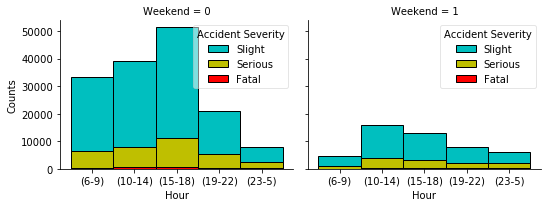

In [34]:
xval='Time_Period'
bins = np.linspace(data[xval].min()-0.5, data[xval].max()+0.5, len(data[xval].unique())+1)
g = sns.FacetGrid(data, col='Weekend', hue='Accident_Severity',
                  palette=['c','y','r'], col_wrap=4, aspect=1.2)
g.map(plt.hist, xval, ec='k', bins=bins)
g.fig.tight_layout()

for index, aa in enumerate(g.axes):
    aa.set_xlabel('Hour')
    aa.xaxis.set_ticks(range(0,5))
    aa.xaxis.set_ticklabels(['(6-9)', '(10-14)', '(15-18)', '(19-22)', '(23-5)'])
    aa.legend(loc='upper right',title='Accident Severity',framealpha=0.5)
g.axes[0].set_ylabel('Counts')
plt.show()

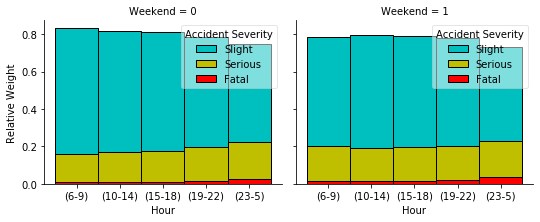

In [35]:
xval='Time_Period'
g = sns.FacetGrid(data, col='Weekend', col_wrap=4, aspect=1.2)
g.map_dataframe(plot_norm, x=xval, ec='k', data=data, normalize=True)
for index, aa in enumerate(g.axes):
    aa.set_xlabel('Hour')
    aa.xaxis.set_ticks(range(0,5))
    aa.xaxis.set_ticklabels(['(6-9)', '(10-14)', '(15-18)', '(19-22)', '(23-5)'])
    aa.legend(loc='upper right',title='Accident Severity',framealpha=0.5)
g.axes[0].set_ylabel('Relative Weight')
plt.show()

#### Month

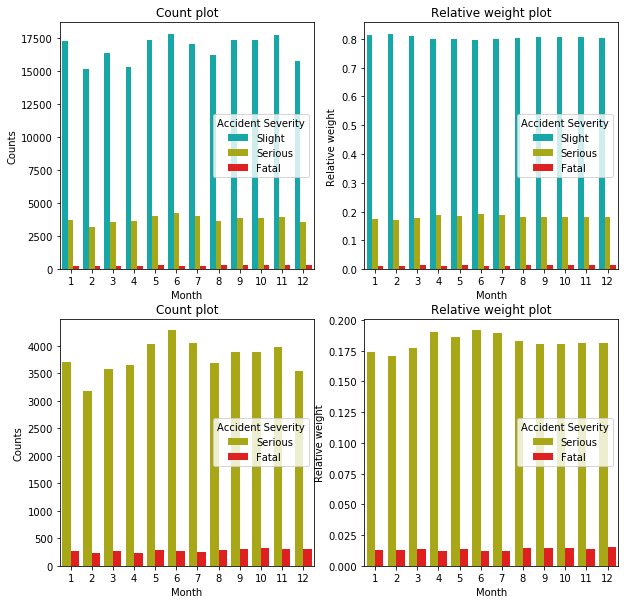

In [36]:
# Evaluate the influence of month
xval='Month'
fig = plt.figure(figsize=(10,10))
count_weight_plot(data,xval)
for aa in fig.axes:
    aa.set_xlabel('Month')
    aa.legend(loc='center right',title='Accident Severity')
plt.show()

There seem not to be a clear indication of the influence of month. The count distribution shows three maxima at January, June and November. However, the relative weight distribution is basically the same for all months.

The months can be grouped by season.

In [37]:
# Define 'Season' variable
# Meteorological seasons:
# Winter: 1 December to 28 February, Spring: 1 March to 31 May, Summer 1 June to 31 August, Autumn: 1 September to 30 November
def find_season(x):
    if ((x==12) or (1<=x<=2)):
        return 0
    if (3<=x<=5):
        return 1
    if (6<=x<=8):
        return 2
    if (9<=x<=11):
        return 3
    else:
        return -1

data['Season']=data['Month'].apply(find_season)

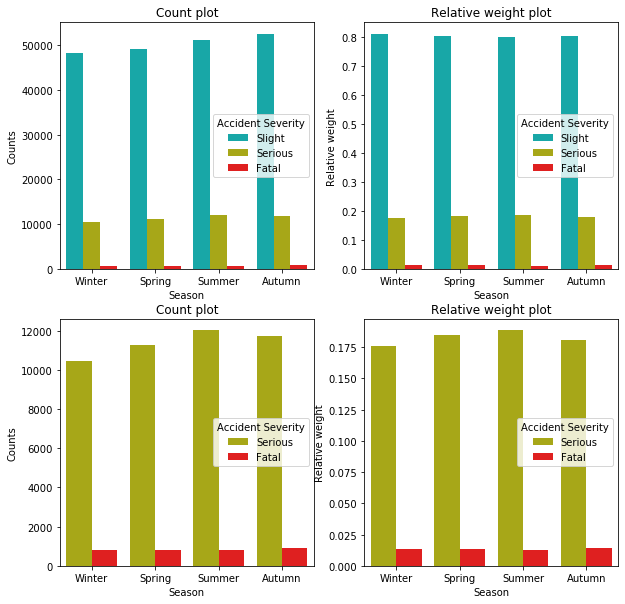

In [38]:
xval='Season'
fig = plt.figure(figsize=(10,10))
count_weight_plot(data,xval)
for aa in fig.axes:
    aa.set_xlabel('Season')
    aa.xaxis.set_ticks(range(0,4))
    aa.xaxis.set_ticklabels(['Winter', 'Spring', 'Summer', 'Autumn'])
    aa.legend(loc='center right',title='Accident Severity')
plt.show()

#### Road Type

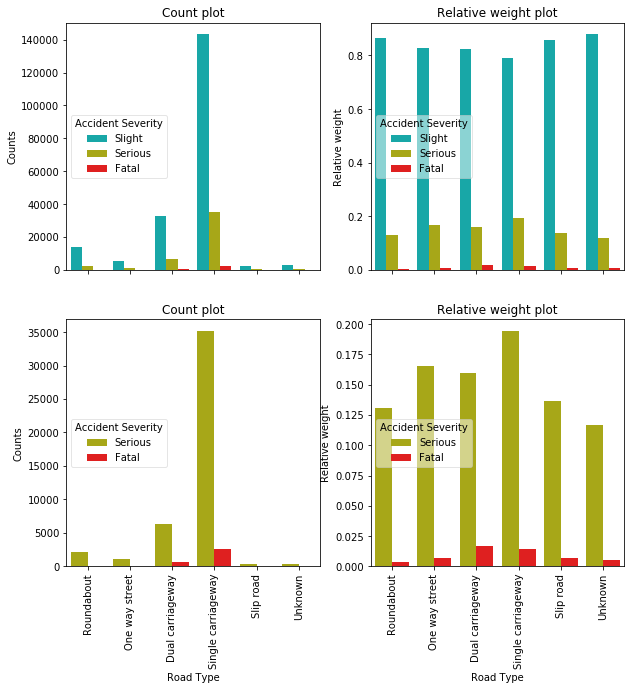

In [39]:
# Evaluate the influence of Road Type
xval='Road_Type'
fig = plt.figure(figsize=(10,10))
count_weight_plot(data,xval)
roadtype=['Roundabout','One way street','Dual carriageway','Single carriageway',
           'Slip road','Unknown','One way street/Slip road']
for index,aa in enumerate(fig.axes):
    if (index > 1):
        aa.xaxis.set_ticks(range(0,6))
        aa.xaxis.set_ticklabels(roadtype,rotation='vertical')
        aa.set_xlabel('Road Type')
    else:
        aa.xaxis.set_ticklabels([])
        aa.set_xlabel('')
    aa.legend(loc='center left',title='Accident Severity',framealpha=0.5)
plt.show()

The majority of accidents happened on single carriageway roads, followed by dual carriageway roads and roundabouts.

When considering the relative weight, dual carriageway roads had the higher relative value of fatal accidents. This is probably related to the fact that these roads have the higher speed limit.

Roundabouts show the smallest relative weight of fatal accidents for this category.

#### Junction Details

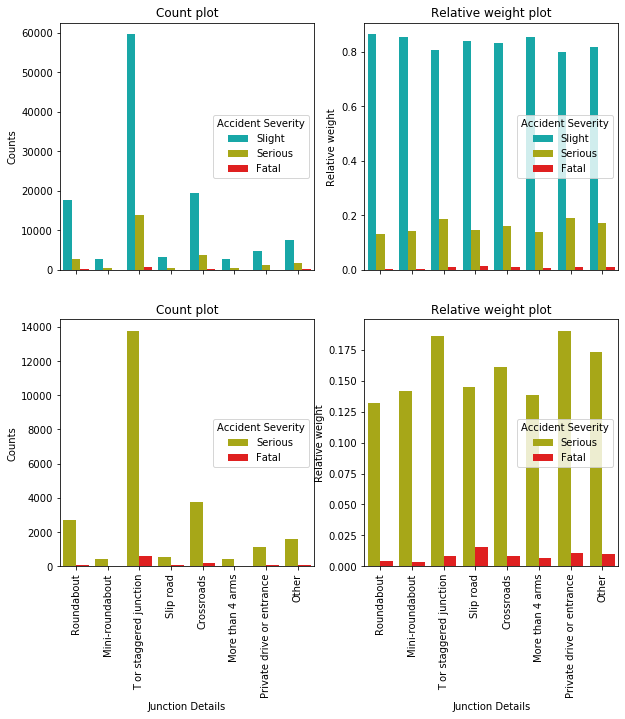

In [40]:
# Evaluate the influence of Junction Detail
xval='Junction_Detail'
fig = plt.figure(figsize=(10,10))
# Junction_Detail = 0 means No Junction
count_weight_plot(data[data['Junction_Detail']!=0],xval)
junctiondetail=['Roundabout','Mini-roundabout','T or staggered junction',
                'Slip road','Crossroads','More than 4 arms','Private drive or entrance','Other']

for index,aa in enumerate(fig.axes):
    if (index > 1):
        aa.xaxis.set_ticks(range(0,8))
        aa.xaxis.set_ticklabels(junctiondetail,rotation='vertical')
        aa.set_xlabel('Junction Details')
    else:
        aa.xaxis.set_ticklabels([])
        aa.set_xlabel('')
    aa.legend(loc='center right',title='Accident Severity')#,framealpha=0.5)
plt.show()

The majority of the accidents that happened in correspondence of road junctions happened at T or staggered junctions, followed by normal crossroads and roundabouts.

When considering the relative weight of accident severity, the junctions with higher relative weight of serious accidents were T or staggered junctions and private drives. The maximum of the relative weight of fatal accidents is for slip road junctons, followed by private drives, T or staggered junctions and normal crossroads.

#### Road Surface Conditions

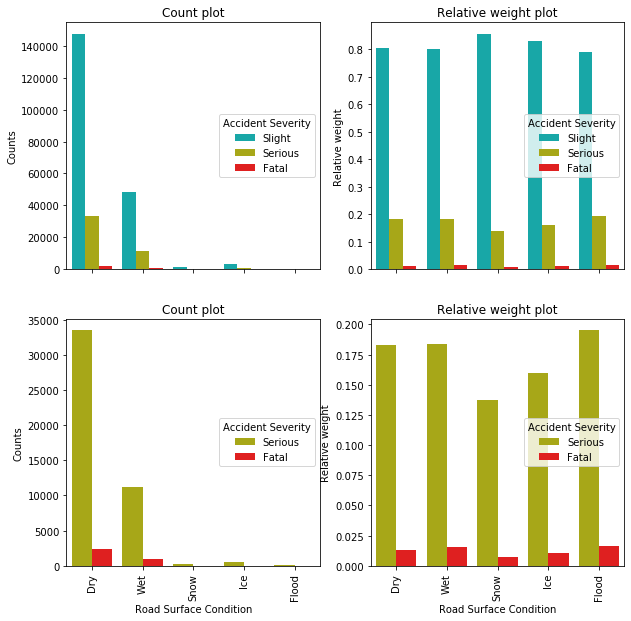

In [41]:
# Evaluate the influence of Road Surface Condition
xval='Road_Surface_Conditions'
fig = plt.figure(figsize=(10,10))
count_weight_plot(data,xval)
junctiondetail=['Dry','Wet','Snow','Ice','Flood']


for index,aa in enumerate(fig.axes):
    if (index > 1):
        aa.xaxis.set_ticks(range(0,5))
        aa.xaxis.set_ticklabels(junctiondetail,rotation='vertical')
        aa.set_xlabel('Road Surface Condition')
    else:
        aa.xaxis.set_ticklabels([])
        aa.set_xlabel('')
    aa.legend(loc='center right',title='Accident Severity')
plt.show()

Most of the accidents in the database happened on dry roads, followed by wet roads.

The relative weight of serious accidents show a maximum for flood, followed by wet and dry roads. The relative weight of fatal accidents is higher for wet and flood road surfaces.

Snow and ice surface conditions show the lowest relative weight of serious and fatal accidents. Most probably, people tend to be more cautious when seeing these extreme surface conditions. However, the issue of the number of statistical samples in these cases could bias the analysis.

#### Special Conditions

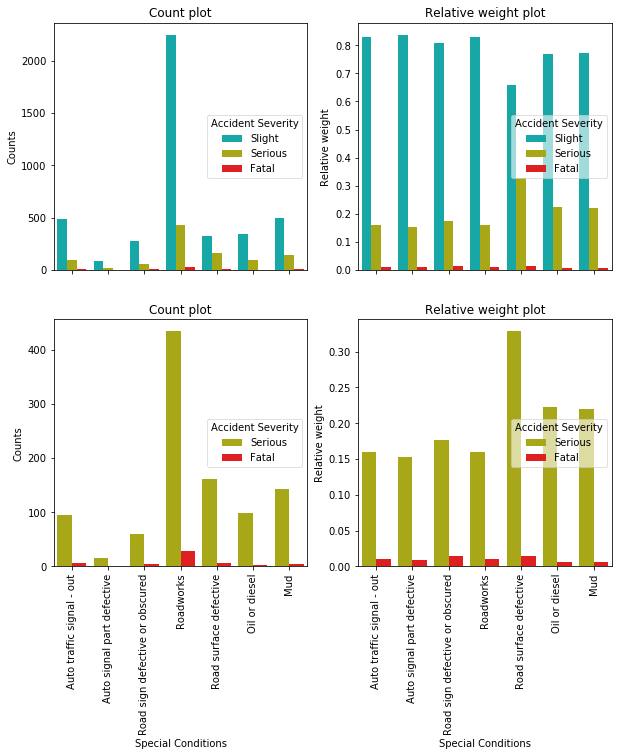

In [42]:
# Evaluate the influence of Special Conditions
xval='Special_Conditions_at_Site'
fig = plt.figure(figsize=(10,10))
# Special Conditions = 0 is 'No Special Conditions'
count_weight_plot(data[data['Special_Conditions_at_Site']!=0],xval)
specialconditions=['Auto traffic signal - out','Auto signal part defective',
                'Road sign defective or obscured','Roadworks','Road surface defective',
                'Oil or diesel','Mud']

for index,aa in enumerate(fig.axes):
    if (index > 1):
        aa.xaxis.set_ticks(range(0,7))
        aa.xaxis.set_ticklabels(specialconditions,rotation='vertical')
        aa.set_xlabel('Special Conditions')
    else:
        aa.xaxis.set_ticklabels([])
        aa.set_xlabel('')
    aa.legend(loc='center right',title='Accident Severity',framealpha=0.6)
plt.show()

The majority of accidents that happened with special road conditions were in correspondece of roadworks. The relative weight plots shows that the maximum relative weight of serious accidents is for defective road surfaces, followed by oil and mud. For fatal accidents, the maximum relative weight corresponds to defective road signs and defective road surface.

#### Carriageway Hazards

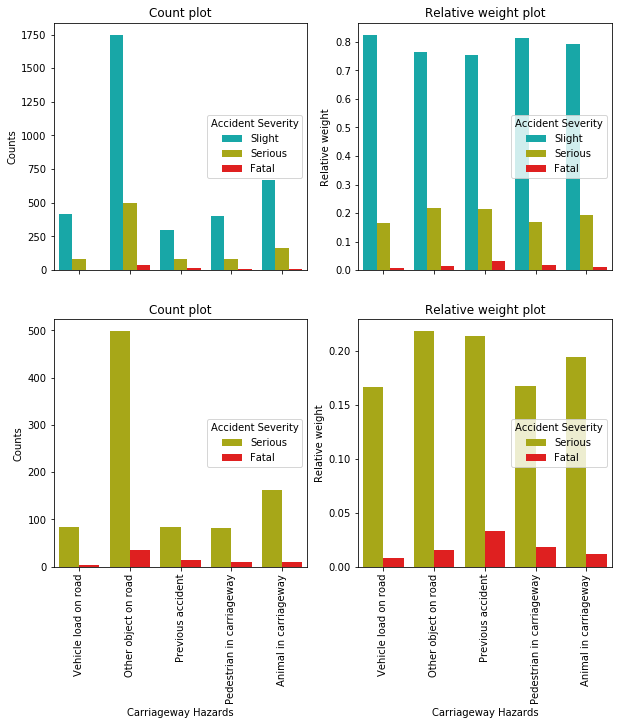

In [43]:
# Evaluate the influence of Carriageway Hazards
xval='Carriageway_Hazards'
fig = plt.figure(figsize=(10,10))
# Carriageway Hazards = 0 is 'None'
count_weight_plot(data[data['Carriageway_Hazards']!=0],xval)
hazards=['Vehicle load on road','Other object on road',
         'Previous accident','Pedestrian in carriageway','Animal in carriageway']

for index,aa in enumerate(fig.axes):
    if (index > 1):
        aa.xaxis.set_ticks(range(0,5))
        aa.xaxis.set_ticklabels(hazards,rotation='vertical')
        aa.set_xlabel('Carriageway Hazards')
    else:
        aa.xaxis.set_ticklabels([])
        aa.set_xlabel('')
    aa.legend(loc='center right',title='Accident Severity')
plt.show()

In case of hazards in the carriageway, the majority of accidents happened for objects or animals in the carriageway.

The relative weight plots shows that the presence of a previous accident has higher relative weight of serious and fatal severity. High relative serious severity happened also in case of general objects in the carriageway. However, the cases of hazards in the carriageway have a relatively small number of statistical samples, so statistical considerations on them could be biased.

#### Light Conditions

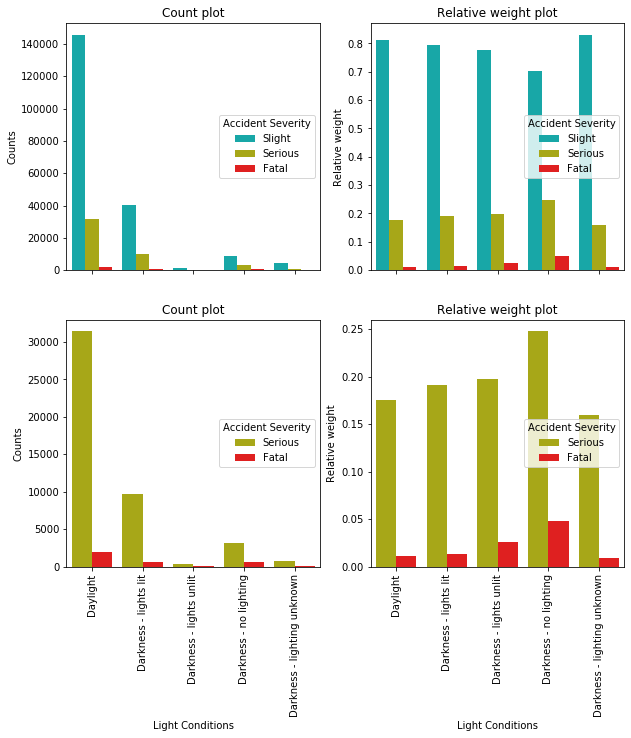

In [44]:
# Evaluate the influence of Light Conditions
xval='Light_Conditions'
fig = plt.figure(figsize=(10,10))
count_weight_plot(data,xval)
lightconditions=['Daylight','Darkness - lights lit','Darkness - lights unlit',
         'Darkness - no lighting','Darkness - lighting unknown']

for index,aa in enumerate(fig.axes):
    if (index > 1):
        aa.xaxis.set_ticks(range(0,5))
        aa.xaxis.set_ticklabels(lightconditions,rotation='vertical')
        aa.set_xlabel('Light Conditions')
    else:
        aa.xaxis.set_ticklabels([])
        aa.set_xlabel('')
    aa.legend(loc='center right',title='Accident Severity')
plt.show()

Most of the accidents happened during daylight. The relative weight plot shows that accidents during darkness condition have higher serious and fatal relative weight. In particular, the situation with lower visibility, i.e. darkness without lighting, has the highest relative weight for both serious and fatal severity. This confirms the previous observation of a slight higher severity risk for accidents that happened at night.

#### Weather Conditions

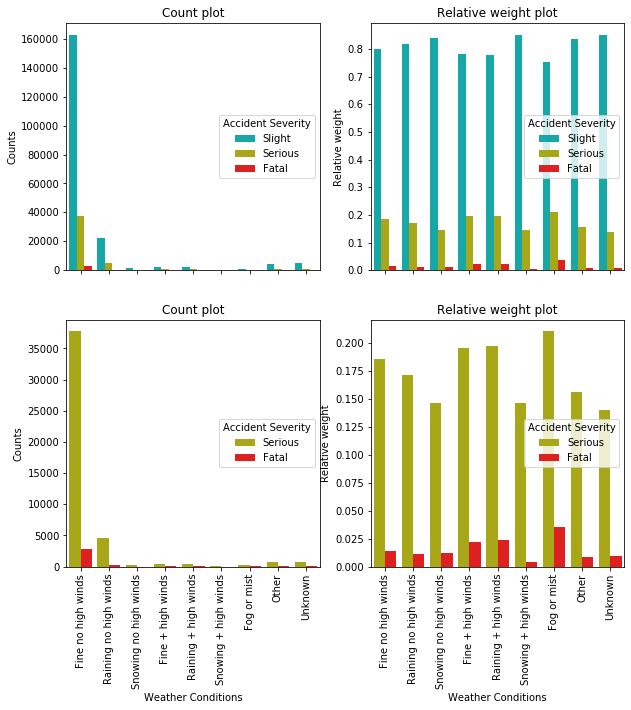

In [45]:
# Evaluate the influence of Weather Conditions
xval='Weather_Conditions'
fig = plt.figure(figsize=(10,10))
count_weight_plot(data,xval)
weatherconditions=['Fine no high winds','Raining no high winds','Snowing no high winds',
                 'Fine + high winds','Raining + high winds','Snowing + high winds',
                 'Fog or mist','Other','Unknown']

for index,aa in enumerate(fig.axes):
    if (index > 1):
        aa.xaxis.set_ticks(range(0,9))
        aa.xaxis.set_ticklabels(weatherconditions,rotation='vertical')
        aa.set_xlabel('Weather Conditions')
    else:
        aa.xaxis.set_ticklabels([])
        aa.set_xlabel('')
    aa.legend(loc='center right',title='Accident Severity')
plt.show()

The majority of accidents happened for fine weather, followed by rain. The relative weight plot shows that the highest risk is for fog and high wind conditions (fine with high winds and rain with high winds).  
The highest relative risk in the case of fog underlines the danger of low visibility conditions.

### Model
[(top)](#toc)

For the classification predictor, the following models will be trained:
- K-Nearest Neighbors
- Decision Tree

and the following ensemble models:
- Bagging Classifier
- Adaptive Boosting
- Random Forest Classifier

Since the data are highly unbalanced, the evaluation metric used for model scoring will be the balanced accuracy score.  
Since the number of accident severity classes is 3, a classification model which assigns all data to the majority class will score 0.33 with this metric. The overall (usual) accuracy of such model, on the other hand, is 0.8, corresponding to the relative weight of the 'Slight' severity class; therefore 'accuracy' is not a good metrics for this problem.

'1st_Road_Class', 'Urban_or_Rural_Area' variables will be dropped because of their correlation with 'Speed_limit'.  
In order to further simplify the model training, 'Carriageway_Hazards' will also be dropped, because the number of serious or fatal accidents with hazards different from 'None' is low compared to the total of cases.

In [46]:
# From the metadata: 1 = Fatal; 2 = Serious; 3 = Slight
data['Accident_Severity'].replace({ 'Fatal' : 1,'Serious' : 2,'Slight' : 3},inplace=True)

In [47]:
# Create the independent variable array
features = ['Road_Type', 'Speed_limit', 'Junction_Detail', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Time_Period', 'Weekend', 'Season']
X = data[features]
y = data['Accident_Severity']

In [48]:
# Scale data for models keeping into account distance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X1 = scaler.transform(X)

In [49]:
# load Python libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix


#### K Nearest Neighbors (KNN)
In the KNN case, the number of neighbors (K) parameter will be tuned with cross validation on the training data.

1
2
3
4
5


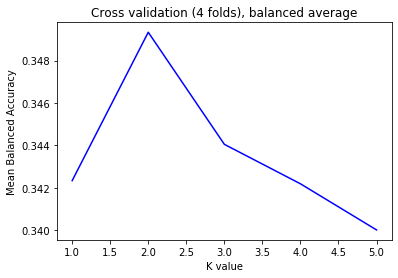

Best K from cross validation (4 folds):  2


In [50]:
# number of neighbors
numberofK = 5
# Note: A run with a larger number of K was run, but the mean balanced accuracy scores
#       became progressively lower (asymptotic to 1/3) for large K values
kappas = range(1,numberofK+1)

# Cycle over K values
# Search for the right K value with the use of cross-validation
# Using balanced_accuracy_score because the distribution of
# Accident Severity is strongly unbalanced
meanaccuracy = []
for K in kappas:
    print(K)
    KNNclassifier = KNeighborsClassifier(n_neighbors = K, n_jobs = -1)
    scores = cross_val_score(KNNclassifier, X1, y, cv=4, scoring='balanced_accuracy', n_jobs = -1)
    meanaccuracy.append(scores.mean())
meanaccuracy = np.array(meanaccuracy)

# Plot mean accuracy from cross val
plt.plot(kappas,meanaccuracy,'b')
plt.title('Cross validation (4 folds), balanced average')
plt.xlabel('K value')
plt.ylabel('Mean Balanced Accuracy')
plt.show()

bestK = meanaccuracy.argmax() + 1

print('Best K from cross validation (4 folds): ',bestK)

In [51]:
KNNclassifier = KNeighborsClassifier(n_neighbors = 2, n_jobs = -1).fit(X1,y)

#### Decision Tree
In the decision tree case, the number of branches parameter will be tuned with cross validation on the training data.
The use of class_weight='balanced' is roughly equivalent to the *oversampling* of the data belonging to the least populated categories.

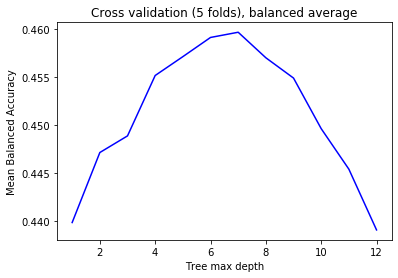

Best max_depth from cross validation (5 folds):  7


In [52]:
# Optimize max_depth for the decision tree
numberofB = 12
branches = range(1,numberofB+1)

# Cycle over branch values
# Search for the right branch depth value with the use of cross-validation
# Using balanced_accuracy_score because the distribution of
# Accident Severity is strongly unbalanced
meanaccuracy = []
for B in branches:
    #print(B)
    treeclassifier = DecisionTreeClassifier(criterion='entropy', max_depth=B, class_weight='balanced')
    scores = cross_val_score(treeclassifier, X, y, cv=5, scoring='balanced_accuracy', n_jobs=-1)
    meanaccuracy.append(scores.mean())
meanaccuracy = np.array(meanaccuracy)

# Plot mean accuracy from cross val
plt.plot(branches,meanaccuracy,'b')
plt.title('Cross validation (5 folds), balanced average')
plt.xlabel('Tree max depth')
plt.ylabel('Mean Balanced Accuracy')
plt.show()

bestB = meanaccuracy.argmax() + 1

print('Best max_depth from cross validation (5 folds): ',bestB)

In [53]:
treeclassifier = DecisionTreeClassifier(criterion='entropy', max_depth=7, class_weight='balanced').fit(X, y)

#### Bootstrap Aggregating (Bagging) Classifier
In the Bagging Classifier case, the number of estimators parameter will be tuned with cross validation on the training data.
The use of class_weight='balanced' in the underlying base estimator is roughly equivalent to the *oversampling* of the data belonging to the least populated categories.

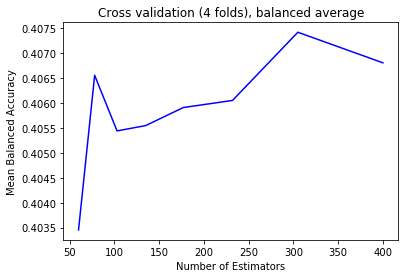

Best n_estimators from cross validation (4 folds):  305


In [54]:
# Optimize n_estimators for the bagging classifier
numberofE = 8
estimators = np.logspace(np.log10(60),np.log10(400),numberofE).astype(int)

# Cycle over number of estimators values
# Search for the best n_estimators value with the use of cross-validation
# Using balanced_accuracy_score because the distribution of
# Accident Severity is strongly unbalanced
meanaccuracy = []
model = DecisionTreeClassifier(class_weight='balanced')
for E in estimators:
    #print(E)
    bagclassifier = BaggingClassifier(base_estimator=model, max_features=X.shape[1], n_estimators=E, n_jobs=-1)
    scores = cross_val_score(bagclassifier, X, y, cv=4, scoring='balanced_accuracy', n_jobs=-1)
    meanaccuracy.append(scores.mean())
meanaccuracy = np.array(meanaccuracy)

# Plot mean accuracy from cross val
plt.plot(estimators,meanaccuracy,'b')
plt.title('Cross validation (4 folds), balanced average')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Balanced Accuracy')
plt.show()

bestE = meanaccuracy.argmax()
print('Best n_estimators from cross validation (4 folds): ', estimators[bestE])

The values of balanced accuracy does not change much with the number of estimators in the range 100-300.

In [55]:
bagclassifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                                  max_features=X.shape[1], n_estimators=300, n_jobs=-1)
bagclassifier.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=10, n_estimators=300, n_jobs=-1)

#### Adaptive Boosting
In the Adaptive Boosting Classifier case, the number of estimators parameter will be tuned with cross validation on the training data.
The use of class_weight='balanced' in the underlying base estimator is roughly equivalent to the *oversampling* of the data belonging to the least populated categories.

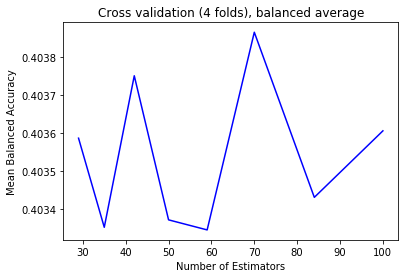

Best n_estimators from cross validation (4 folds):  70


In [57]:
# Optimize n_estimators for the adaptive boosting classifier
numberofE = 8
estimators = np.logspace(np.log10(30),np.log10(100),numberofE).astype(int)

# Cycle over number of estimators values
# Search for the best n_estimators value with the use of cross-validation
# Using balanced_accuracy_score because the distribution of
# Accident Severity is strongly unbalanced
meanaccuracy = []
model = DecisionTreeClassifier(class_weight='balanced')
for E in estimators:
    #print(E)
    adaboostclassifier = AdaBoostClassifier(base_estimator=model, n_estimators=E)
    scores = cross_val_score(adaboostclassifier, X, y, cv=4, scoring='balanced_accuracy', n_jobs=-1)
    meanaccuracy.append(scores.mean())
meanaccuracy = np.array(meanaccuracy)

# Plot mean accuracy from cross val
plt.plot(estimators,meanaccuracy,'b')
plt.title('Cross validation (4 folds), balanced average')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Balanced Accuracy')
plt.show()

bestE = meanaccuracy.argmax()

print('Best n_estimators from cross validation (4 folds): ',estimators[bestE])

The values of balanced accuracy does not change much with the number of estimators in the range 40-80.

In [58]:
adaboostclassifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'), n_estimators=70)
adaboostclassifier.fit(X,y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                   n_estimators=70)

#### Random Forest Classifier
In the Random Forest Classifier case, the number of estimators and max depth parameters will be tuned with grid cross validation on the training data.
The use of class_weight='balanced' is roughly equivalent to the *oversampling* of the data belonging to the least populated categories.

In [59]:
# Optimize n_estimators and max_depth for the random forest classifier
numberofE = 5
estimators = np.logspace(np.log10(30),np.log10(100),numberofE).astype(int)
depths = range(4,10)

# Search for the best n_estimators and max_depth
# values with the use of grid cross-validation
# Using balanced_accuracy_score because the distribution of
# Accident Severity is strongly unbalanced
forestclassifier = RandomForestClassifier(n_jobs=-1, class_weight='balanced')
param_grid = {'n_estimators': estimators, 'max_depth' : depths}

CV_rfc = GridSearchCV(estimator=forestclassifier, param_grid=param_grid,
                      cv= 4, scoring='balanced_accuracy')
CV_rfc.fit(X, y)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             param_grid={'max_depth': range(4, 10),
                         'n_estimators': array([ 29,  40,  54,  74, 100])},
             scoring='balanced_accuracy')

In [60]:
CV_rfc.best_params_

{'max_depth': 7, 'n_estimators': 74}

In [61]:
CV_rfc.best_score_

0.4650959589310925

The best parameters are around 6-7 for max_depth and 50-70 for the number of estimators.

In [62]:
forestclassifier = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=7, n_estimators=70).fit(X,y)

#### Balanced Bagging Classifier
It is possible to use the Balanced Bagging Classifier from imblearn package. The use of this classifier with the default parameters is equivalent to the *undersampling* of the data belonging to all the classes except the minority one, with the use of 'RandomUnderSampler'.

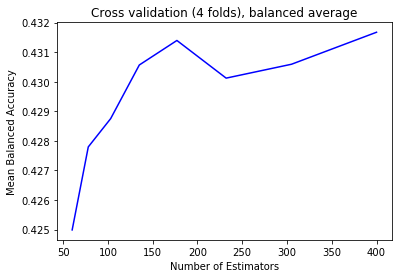

Best n_estimators from cross validation (4 folds):  400


In [63]:
from imblearn.ensemble import BalancedBaggingClassifier

# Optimize n_estimators for the balanced bagging classifier
numberofE = 8
estimators = np.logspace(np.log10(60),np.log10(400),numberofE).astype(int)

# Cycle over number of estimators values
# Search for the best n_estimators value with the use of cross-validation
# Using balanced_accuracy_score because the distribution of
# Accident Severity is strongly unbalanced
meanaccuracy = []
for E in estimators:
    balancedbagclassifier = BalancedBaggingClassifier(max_features=X.shape[1], n_estimators=E, n_jobs=-1)
    scores = cross_val_score(balancedbagclassifier, X, y, cv=4, scoring='balanced_accuracy', n_jobs=-1)
    meanaccuracy.append(scores.mean())
meanaccuracy = np.array(meanaccuracy)

# Plot mean accuracy from cross val
plt.plot(estimators,meanaccuracy,'b')
plt.title('Cross validation (4 folds), balanced average')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Balanced Accuracy')
plt.show()

bestE = meanaccuracy.argmax()
print('Best n_estimators from cross validation (4 folds): ', estimators[bestE])

The values of balanced accuracy does not change much with the number of estimators in the range 150-400.

In [64]:
balancedbagclassifier = BalancedBaggingClassifier(max_features=X.shape[1], n_estimators=200, n_jobs=-1)
balancedbagclassifier.fit(X,y)

BalancedBaggingClassifier(max_features=10, n_estimators=200, n_jobs=-1)

#### Balanced Random Forest
It is possible to use the Balanced Random Forest from imblearn package. The use of this classifier with the default parameters is equivalent to the *undersampling* of the data belonging to all the classes except the minority one.

In [67]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Optimize n_estimators  and max_depth for the balanced random forest classifier
numberofE = 5
estimators = np.logspace(np.log10(30),np.log10(100),numberofE).astype(int)
depths = range(4,10)

# Using balanced_accuracy_score because the distribution of
# Accident Severity is strongly unbalanced
meanaccuracy = []
balancedforestclassifier = BalancedRandomForestClassifier(n_jobs=-1)
param_grid = {'n_estimators': estimators, 'max_depth' : depths}

CV_rfc1 = GridSearchCV(estimator=balancedforestclassifier, param_grid=param_grid, cv= 4,
                      scoring='balanced_accuracy')
CV_rfc1.fit(X, y)


GridSearchCV(cv=4, estimator=BalancedRandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': range(4, 10),
                         'n_estimators': array([ 29,  40,  54,  74, 100])},
             scoring='balanced_accuracy')

In [68]:
CV_rfc1.best_params_

{'max_depth': 8, 'n_estimators': 74}

In [69]:
CV_rfc.best_score_

0.4650959589310925

The best parameters are around 7-9 for max_depth and around 40-80 for n_estimators.

In [71]:
balancedforestclassifier = BalancedRandomForestClassifier(n_jobs=-1, max_depth=8, n_estimators=70).fit(X,y)

#### Test the Model
[(top)](#toc)

The trained classifiers will now be tested against the accident data from 2016.

In [72]:
# Load test data and trasnform it to feed it to the trained classifiers
df2016=pd.read_csv('dftRoadSafety_Accidents_2016.csv',low_memory=False)
df2016.replace(-1,np.nan,inplace=True)
df2016.drop(labels=['Accident_Index', 'Location_Easting_OSGR','Location_Northing_OSGR',
                        'Longitude', 'Latitude', 'Police_Force', 'Number_of_Vehicles',
                        'Number_of_Casualties', 'Local_Authority_(District)',
                        'Local_Authority_(Highway)', '1st_Road_Number', 'Junction_Control',
                        '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
                        'Pedestrian_Crossing-Physical_Facilities', 'Did_Police_Officer_Attend_Scene_of_Accident',
                        'LSOA_of_Accident_Location'], axis=1, inplace=True)
df2016['Month']=pd.DatetimeIndex(df2016.Date).month
df2016.drop(['Date'], axis=1, inplace=True)
df2016['Time']=pd.DatetimeIndex(df2016.Time).hour
df2016.rename(columns={'Time':'Hour'},inplace=True)
df2016['Special_Conditions_at_Site'] = df2016['Special_Conditions_at_Site'].fillna(0)
df2016['Carriageway_Hazards'] = df2016['Carriageway_Hazards'].fillna(0)
df2016['Junction_Detail'] = df2016['Junction_Detail'].fillna(0)
df2016.dropna(inplace=True)
df2016.reset_index(drop=True,inplace=True)
df2016.Hour = df2016.Hour.astype(int)
df2016['Time_Period']=df2016['Hour'].apply(find_time_period)
df2016['Weekend']=df2016['Day_of_Week'].apply(find_weekend)
df2016['Season']=df2016['Month'].apply(find_season)

X_test = df2016[features]
y_test = df2016['Accident_Severity']

scaler_test = StandardScaler().fit(X_test)
X_test1 = scaler_test.transform(X_test)

In [73]:
y_test_predKNN = KNNclassifier.predict(X_test1)
y_test_predtree = treeclassifier.predict(X_test)
y_test_predbag = bagclassifier.predict(X_test)
y_test_predada = adaboostclassifier.predict(X_test)
y_test_predforest = forestclassifier.predict(X_test)
y_test_predbrf = balancedforestclassifier.predict(X_test)
y_test_predbalbag = balancedbagclassifier.predict(X_test)

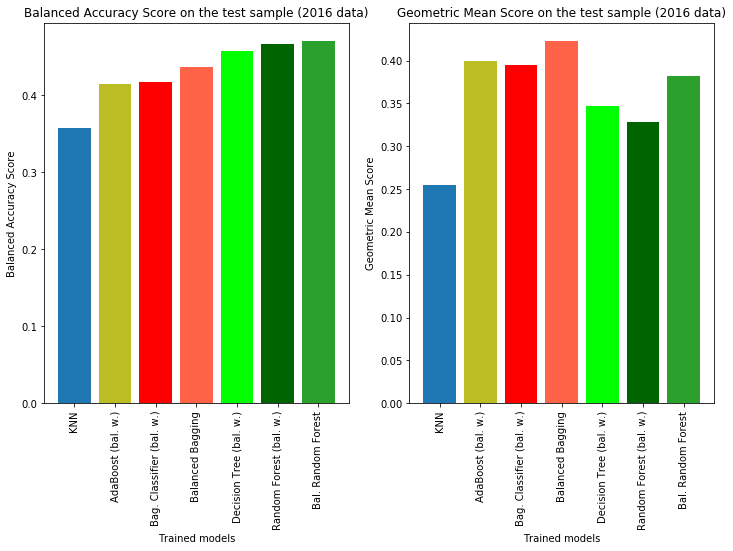

In [76]:
# Calculate metrics with the trained models
models = ['KNN', 'AdaBoost (bal. w.)', 'Bag. Classifier (bal. w.)', 'Balanced Bagging',
           'Decision Tree (bal. w.)', 'Random Forest (bal. w.)', 'Bal. Random Forest']

acc_scores = []
# balanced accuracy score
acc_scores.append(balanced_accuracy_score(y_test,y_test_predKNN))
acc_scores.append(balanced_accuracy_score(y_test,y_test_predada))
acc_scores.append(balanced_accuracy_score(y_test,y_test_predbag))
acc_scores.append(balanced_accuracy_score(y_test,y_test_predbalbag))
acc_scores.append(balanced_accuracy_score(y_test,y_test_predtree))
acc_scores.append(balanced_accuracy_score(y_test,y_test_predforest))
acc_scores.append(balanced_accuracy_score(y_test,y_test_predbrf))

plt.figure(figsize=(12,7))
ax1=plt.subplot(1,2,1)
ax1.bar(x=models,height=acc_scores,color=['tab:blue', 'tab:olive', 'r', 'tomato', 'lime', 'darkgreen', 'tab:green'])
plt.xlabel('Trained models')
plt.ylabel('Balanced Accuracy Score')
plt.title('Balanced Accuracy Score on the test sample (2016 data)')
plt.xticks(rotation='vertical')

from imblearn.metrics import geometric_mean_score
gm_scores = []
# geometric mean score
gm_scores.append(geometric_mean_score(y_test,y_test_predKNN))
gm_scores.append(geometric_mean_score(y_test,y_test_predada))
gm_scores.append(geometric_mean_score(y_test,y_test_predbag))
gm_scores.append(geometric_mean_score(y_test,y_test_predbalbag))
gm_scores.append(geometric_mean_score(y_test,y_test_predtree))
gm_scores.append(geometric_mean_score(y_test,y_test_predforest))
gm_scores.append(geometric_mean_score(y_test,y_test_predbrf))

ax2=plt.subplot(1,2,2)
ax2.bar(x=models,height=gm_scores,color=['tab:blue', 'tab:olive', 'r', 'tomato', 'lime', 'darkgreen', 'tab:green'])
plt.xlabel('Trained models')
plt.ylabel('Geometric Mean Score')
plt.title('Geometric Mean Score on the test sample (2016 data)')
plt.xticks(rotation='vertical')
plt.show()

A model which predicts only the most frequent label would score 0.33 with the Balanced Accuracy Score metric. The KNN model scores only slightly better than such a model. All other models score slightly more than 0.4, with Decision Tree and Random Forest models scoring the best, around 0.46-0.47. Balanced Bagging scores around 0.44.

The Geometric Mean Score score 0 if a class is completely not recognized. With this metrics the highest score is obtained by the Balanced Bagging, around 0.42, followed by Bagging Classifier and AdaBoost Classifier around 0.4, and Balanced Random Forest at 0.38. A higher Geometric Mean Score means a higher accuracy on each of the classes. KNN performs very poorly at 0.26.

We can look at the confusion matrix for these models to see how each class is predicted.

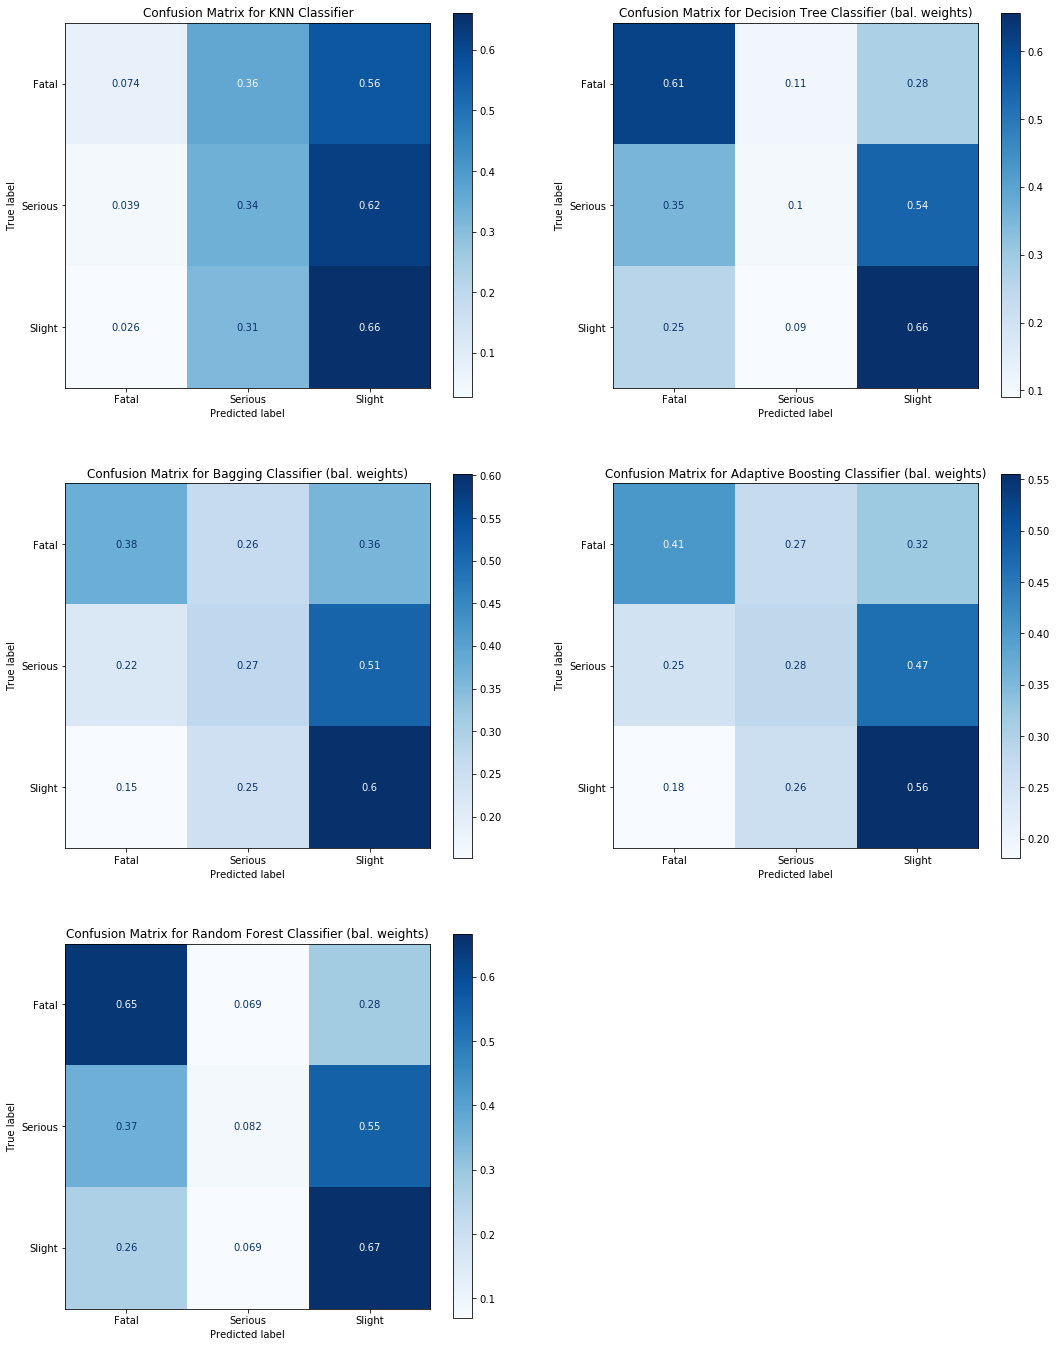

In [78]:
plt.figure(figsize=(18,24))
disp = plot_confusion_matrix(KNNclassifier, X_test1, y_test,
                             display_labels=['Fatal','Serious','Slight'], cmap=plt.cm.Blues,
                             normalize='true', ax=plt.subplot(3,2,1))
disp.ax_.set_title('Confusion Matrix for KNN Classifier')

disp = plot_confusion_matrix(treeclassifier, X_test, y_test,
                             display_labels=['Fatal','Serious','Slight'], cmap=plt.cm.Blues,
                             normalize='true', ax=plt.subplot(3,2,2))
disp.ax_.set_title('Confusion Matrix for Decision Tree Classifier (bal. weights)')

disp = plot_confusion_matrix(bagclassifier, X_test, y_test,
                             display_labels=['Fatal','Serious','Slight'], cmap=plt.cm.Blues,
                             normalize='true', ax=plt.subplot(3,2,3))
disp.ax_.set_title('Confusion Matrix for Bagging Classifier (bal. weights)')

disp = plot_confusion_matrix(adaboostclassifier, X_test, y_test,
                             display_labels=['Fatal','Serious','Slight'], cmap=plt.cm.Blues,
                             normalize='true', ax=plt.subplot(3,2,4))
disp.ax_.set_title('Confusion Matrix for Adaptive Boosting Classifier (bal. weights)')

disp = plot_confusion_matrix(forestclassifier, X_test, y_test,
                             display_labels=['Fatal','Serious','Slight'], cmap=plt.cm.Blues,
                             normalize='true', ax=plt.subplot(3,2,5))
disp.ax_.set_title('Confusion Matrix for Random Forest Classifier (bal. weights)')

plt.show()

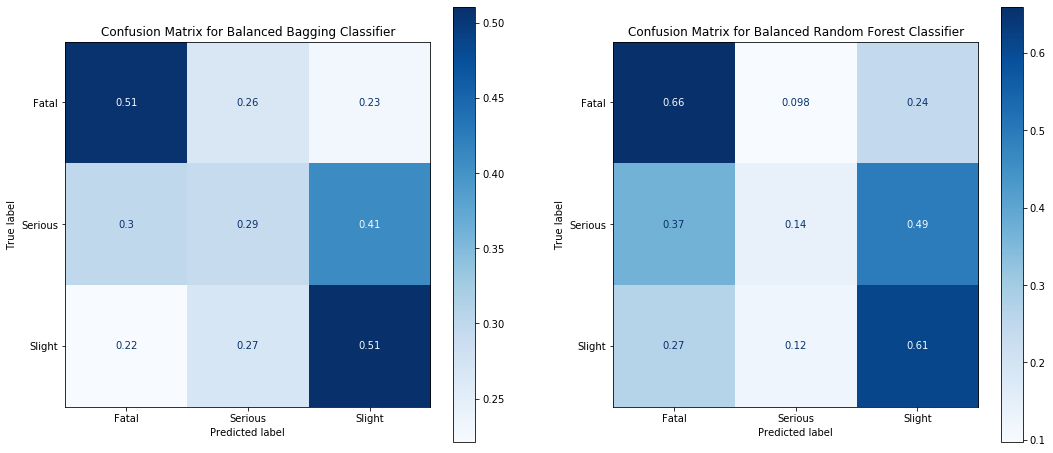

In [79]:
plt.figure(figsize=(18,8))
disp = plot_confusion_matrix(balancedbagclassifier, X_test, y_test,
                             display_labels=['Fatal','Serious','Slight'], cmap=plt.cm.Blues,
                             normalize='true', ax=plt.subplot(1,2,1))
disp.ax_.set_title('Confusion Matrix for Balanced Bagging Classifier')

disp = plot_confusion_matrix(balancedforestclassifier, X_test, y_test,
                             display_labels=['Fatal','Serious','Slight'], cmap=plt.cm.Blues,
                             normalize='true', ax=plt.subplot(1,2,2))
disp.ax_.set_title('Confusion Matrix for Balanced Random Forest Classifier')
plt.show()

As seen in the confusion matrix, the behavior of KNN Classifier is skewed towards a majority class predictor: roughly 60% of all classes are predicted as the most frequent label ('Slight').  
Bagging and AdaBoost classifiers perform better in the prediction of the different classes. However, actual 'Serious' class is still mostly predicted as 'Slight' (50% of times), and 'Fatal' is correctly predicted only roughly 40% of times. The Balanced Bagging performs better on the 'Serious' class, with correct prediction roughly 30% of times; it reaches a recall around 50% for 'Fatal' and 'Slight' cases.
The tree and ensemble tree classifiers performs better for 'Slight' and 'Fatal' classes, reaching a relative accuracy around 60-70% for both classes. However, actual 'Serious' cases are missclassified roughly 50% as 'Slight' and 40% as 'Fatal'.

We could see, if reducing the classes to two cases 'Serious/Fatal' and 'Slight' can improve the prediction performances.  
Only the Balanced Bagging Classifier and the Balanced Random Forest case will be trained.

In [80]:
# Prepare new y data by merging 'Fatal' and 'Serious'
ynew = y.replace(1,2)
y_testnew = y_test.replace(1,2)

#### Balanced Bagging for 2 target classes

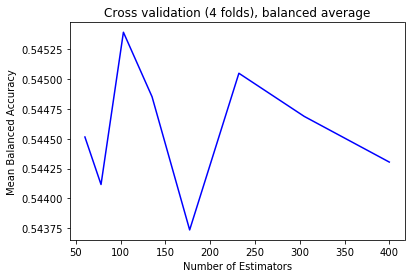

Best n_estimators from cross validation (4 folds):  103


In [81]:
# Optimize n_estimators for the balanced bagging classifier
numberofE = 8
estimators = np.logspace(np.log10(60),np.log10(400),numberofE).astype(int)

# Cycle over number of estimators values
# Search for the best n_estimators value with the use of cross-validation
# Using balanced_accuracy_score because the distribution of
# Accident Severity is strongly unbalanced
meanaccuracy = []
for E in estimators:
    balancedbagclassifiernew = BalancedBaggingClassifier(max_features=X.shape[1], n_estimators=E, n_jobs=-1)
    scores = cross_val_score(balancedbagclassifiernew, X, ynew, cv=4, scoring='balanced_accuracy', n_jobs=-1)
    meanaccuracy.append(scores.mean())
meanaccuracy = np.array(meanaccuracy)

# Plot mean accuracy from cross val
plt.plot(estimators,meanaccuracy,'b')
plt.title('Cross validation (4 folds), balanced average')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Balanced Accuracy')
plt.show()

bestE = meanaccuracy.argmax()
print('Best n_estimators from cross validation (4 folds): ', estimators[bestE])

In [82]:
balancedbagclassifiernew = BalancedBaggingClassifier(max_features=X.shape[1], n_estimators=100, n_jobs=-1).fit(X,ynew)

#### Balanced Random Forest for 2 target classes

In [83]:
# Optimize n_estimators  and max_depth for the balanced random forest classifier
numberofE = 6
estimators = np.logspace(np.log10(30),np.log10(200),numberofE).astype(int)
depths = range(5,11)

# Using balanced_accuracy_score because the distribution of
# Accident Severity is strongly unbalanced
meanaccuracy = []
balancedforestclassifiernew = BalancedRandomForestClassifier(n_jobs=-1)
param_grid = {'n_estimators': estimators, 'max_depth' : depths}

CV_rfc2 = GridSearchCV(estimator=balancedforestclassifiernew, param_grid=param_grid, cv= 4,
                      scoring='balanced_accuracy')
CV_rfc2.fit(X, ynew)


GridSearchCV(cv=4, estimator=BalancedRandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': range(5, 11),
                         'n_estimators': array([ 29,  43,  64,  93, 136, 200])},
             scoring='balanced_accuracy')

In [84]:
CV_rfc2.best_params_

{'max_depth': 9, 'n_estimators': 29}

In [85]:
CV_rfc2.best_score_

0.5654095561342158

In [86]:
balancedforestclassifiernew = BalancedRandomForestClassifier(n_jobs=-1, max_depth=9, n_estimators=30).fit(X,ynew)

#### Test the new models

Test the new models trained on only two target classes

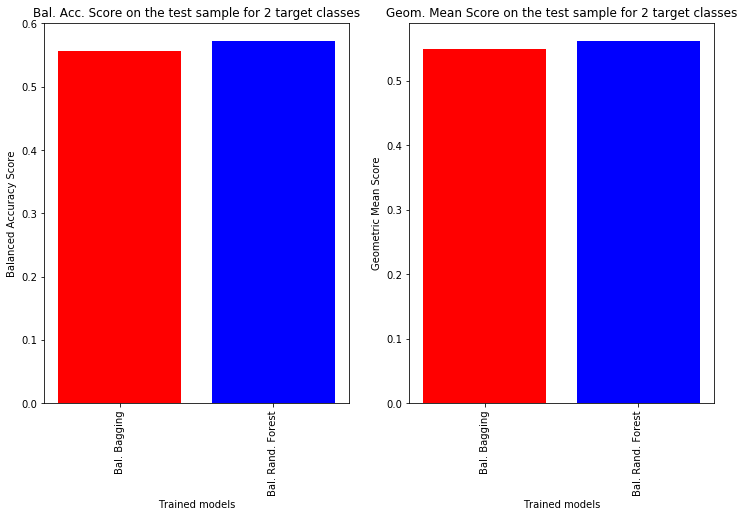

In [87]:
y_test_predbbagnew = balancedbagclassifiernew.predict(X_test)
y_test_predbrfnew = balancedforestclassifiernew.predict(X_test)

# Calculate metrics with the trained models
modelsnew = ['Bal. Bagging', 'Bal. Rand. Forest']

acc_scoresnew = []
# balanced accuracy score
acc_scoresnew.append(balanced_accuracy_score(y_testnew,y_test_predbbagnew))
acc_scoresnew.append(balanced_accuracy_score(y_testnew,y_test_predbrfnew))

plt.figure(figsize=(12,7))
ax1=plt.subplot(1,2,1)
ax1.bar(x=modelsnew,height=acc_scoresnew,color=['r','b'])
plt.xlabel('Trained models')
plt.ylabel('Balanced Accuracy Score')
plt.title('Bal. Acc. Score on the test sample for 2 target classes')
plt.xticks(rotation='vertical')

gm_scoresnew = []
# geometric mean score
gm_scoresnew.append(geometric_mean_score(y_testnew,y_test_predbbagnew))
gm_scoresnew.append(geometric_mean_score(y_testnew,y_test_predbrfnew))

ax2=plt.subplot(1,2,2)
ax2.bar(x=modelsnew,height=gm_scoresnew,color=['r','b'])
plt.xlabel('Trained models')
plt.ylabel('Geometric Mean Score')
plt.title('Geom. Mean Score on the test sample for 2 target classes')
plt.xticks(rotation='vertical')
plt.show()

Both models perform similarly, with a Balanced Accuracy around 0.56-0.57 and G-Mean around 0.55-0.56. The Balanced Random Forest performs slightly better than the Balanced Bagging.

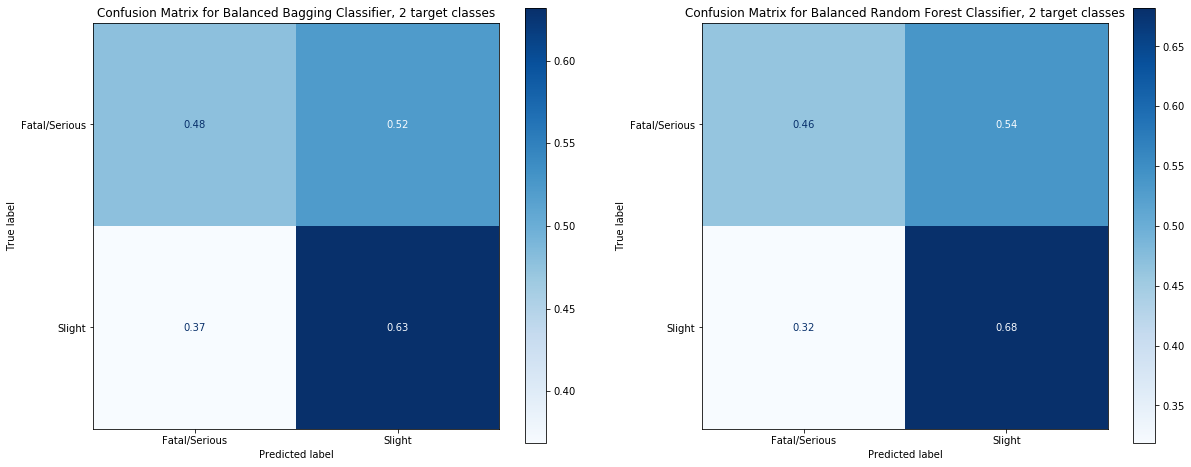

In [88]:
plt.figure(figsize=(20,8))
disp = plot_confusion_matrix(balancedbagclassifiernew, X_test, y_testnew,
                             display_labels=['Fatal/Serious','Slight'], cmap=plt.cm.Blues,
                             normalize='true', ax=plt.subplot(1,2,1))
disp.ax_.set_title('Confusion Matrix for Balanced Bagging Classifier, 2 target classes')

disp = plot_confusion_matrix(balancedforestclassifiernew, X_test, y_testnew,
                             display_labels=['Fatal/Serious','Slight'], cmap=plt.cm.Blues,
                             normalize='true', ax=plt.subplot(1,2,2))
disp.ax_.set_title('Confusion Matrix for Balanced Random Forest Classifier, 2 target classes')
plt.show()

The confusion matrices are also similar.
Roughly 63-68% of true 'Slight' accidents are correctly predicted, but only 46-48% of true cases belonging to the combined class 'Fatal/Serious' accidents are correctly identified.

#### Relative importance
With tree calssifiers it is possible to visualize the (average) relative importance in the classification process.

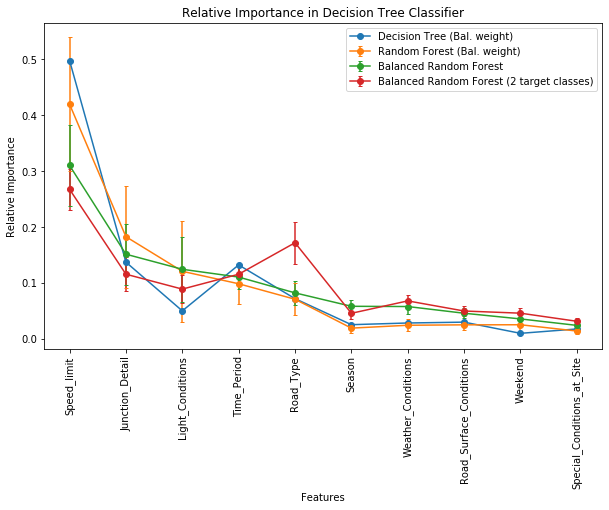

In [89]:
indices = np.argsort(-balancedforestclassifier.feature_importances_)
std0 = np.std([tree.feature_importances_ for tree in forestclassifier.estimators_], axis=0)
std1 = np.std([tree.feature_importances_ for tree in balancedforestclassifier.estimators_], axis=0)
std2 = np.std([tree.feature_importances_ for tree in balancedforestclassifiernew.estimators_], axis=0)
std3 = np.array([ii.feature_importances_ for ii in bagclassifier.estimators_]).std(axis=0)
std4 = np.array([ii[1].feature_importances_ for ii in balancedbagclassifier.estimators_]).std(axis=0)

mean3 = np.array([ii.feature_importances_ for ii in bagclassifier.estimators_]).mean(axis=0)
mean4 = np.array([ii[1].feature_importances_ for ii in balancedbagclassifier.estimators_]).mean(axis=0)

features=np.array(features)

plt.figure(figsize=(10,6))
plt.errorbar(x=features[indices],y=treeclassifier.feature_importances_[indices],
             label='Decision Tree (Bal. weight)',marker='o',markersize=6,capsize=2)
plt.errorbar(x=features[indices],y=forestclassifier.feature_importances_[indices],
             label='Random Forest (Bal. weight)',yerr=std0[indices],marker='o',markersize=6,capsize=2)
plt.errorbar(x=features[indices],y=balancedforestclassifier.feature_importances_[indices],
             label='Balanced Random Forest',yerr=std1[indices],marker='o',markersize=6,capsize=2)
plt.errorbar(x=features[indices],y=balancedforestclassifiernew.feature_importances_[indices],
             label='Balanced Random Forest (2 target classes)',yerr=std2[indices],marker='o',markersize=6,capsize=2)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.title('Relative Importance in Decision Tree Classifier')
plt.legend()
plt.show()

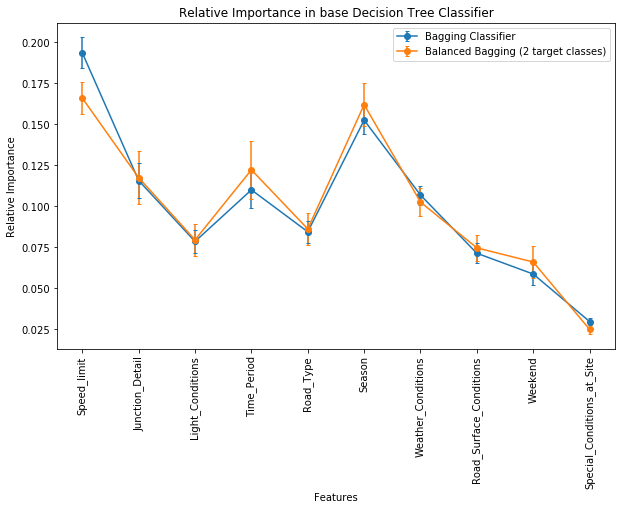

In [90]:
plt.figure(figsize=(10,6))
plt.errorbar(x=features[indices],y=mean3[indices],
             label='Bagging Classifier',yerr=std3[indices],marker='o',markersize=6,capsize=2)
plt.errorbar(x=features[indices],y=mean4[indices],
             label='Balanced Bagging (2 target classes)' ,yerr=std4[indices],marker='o',markersize=6,capsize=2)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.title('Relative Importance in base Decision Tree Classifier')
plt.legend()
plt.show()

The most important feature is speed limit.

The next important features are junction detail, light conditions, time period and road type. This confirms the fact that visibility (light conditions, time period) is an important factor in the severity of the accidents.
It also points out that the type of junction can be a discriminant factor for severity prediction, i.e. some kind of junctions could be relatively more dangerous than others. For example, T or staggered junctions and slip roads have high relative weights of serious and fatal accidents, respectively. Roundabouts are the junctions with the lowest relative weight of both serious and fatal accidents.

The Random Forest trained on the 2 classes dataset showes "road type" as the second most important feature; even in this case, roundabouts have the lowest relative weight of  serious and fatal accidents.

Special conditions at site, weekend label, road surface conditions, weather conditions and season have lower relative impacts in the classification.

Both Bagging Classifiers have similar feature importance rankings.
The most important is speed.
Season scores second with these algorithms.
Time period, junction detail and weather conditions follows in the importance ranking.
Special conditions at site, weekend label, road surface conditions are still at the bottom of the ranking order.